In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score,plot_confusion_matrix,roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc, recall_score, precision_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier, BaggingClassifier


In [2]:
data = pd.read_csv('Titanic.csv', delimiter=';')
data.head()
%matplotlib inline
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
data.isnull().sum() / data.shape[0] * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [4]:
edad_media = data['Age'].mean()

In [5]:
data['Age'].fillna(value= edad_media,inplace=True)

In [6]:
data.drop(columns=['Cabin', 'Embarked', 'Ticket', 'PassengerId'],axis=1, inplace=True)

In [7]:
data.rename(columns={'Pclass': 'Ticket Class', 'SibSp': 'Hermanos o Esposa', 'Parch':'Hijos o padres', 'Fare': 'Precio'}, inplace=True)

In [8]:
data.isnull().sum() / data.shape[0] * 100

Survived             0.0
Ticket Class         0.0
Name                 0.0
Sex                  0.0
Age                  0.0
Hermanos o Esposa    0.0
Hijos o padres       0.0
Precio               0.0
dtype: float64

In [9]:
data.columns

Index(['Survived', 'Ticket Class', 'Name', 'Sex', 'Age', 'Hermanos o Esposa',
       'Hijos o padres', 'Precio'],
      dtype='object')

In [10]:
# for i in data.columns:
#     plt.hist(data[i])
#     plt.title(i)
#     plt.show()

In [11]:
data.head(10)

,Survived,Ticket Class,Name,Sex,Age,Hermanos o Esposa,Hijos o padres,Precio
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.25
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,712.833
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.925
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.05
5,0,3,"Moran, Mr. James",male,29.699118,0,0,84.583
6,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,518.625
7,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,21.075
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,111.333
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,300.708


In [12]:
# for i in data.columns:
#     sns.barplot(data[i].value_counts().index,data[i].value_counts()).set_title(i)
#     plt.show()

In [13]:
data.describe()

,Survived,Ticket Class,Age,Hermanos o Esposa,Hijos o padres
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,13.002015,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [14]:
data['Age']=data['Age'].astype(int)

In [15]:
data.dtypes


Survived              int64
Ticket Class          int64
Name                 object
Sex                  object
Age                   int32
Hermanos o Esposa     int64
Hijos o padres        int64
Precio               object
dtype: object

In [16]:
data_cat = ['Name', 'Sex', 'Precio']

In [17]:
data_num = ['Ticket Class', 'Age', 'Hermanos o Esposa', 'Hijos o padres']

<AxesSubplot:>

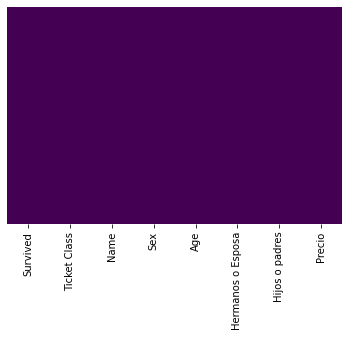

In [18]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
data.isnull().sum()

Survived             0
Ticket Class         0
Name                 0
Sex                  0
Age                  0
Hermanos o Esposa    0
Hijos o padres       0
Precio               0
dtype: int64

In [20]:
y = data['Survived']
X = data.drop(columns=['Survived'], axis=1)

In [21]:
X.columns

Index(['Ticket Class', 'Name', 'Sex', 'Age', 'Hermanos o Esposa',
       'Hijos o padres', 'Precio'],
      dtype='object')

In [22]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [23]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.20,stratify=y, random_state=0)

In [24]:
Model = LogisticRegression()
GraBC = GradientBoostingClassifier()

Me quedo con el gradient boosting   


In [25]:
# pipe.fit(X_train_scl, y_train)

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer


In [27]:
preprocessor = make_column_transformer(
        ( StandardScaler(), data_num),
        ( OneHotEncoder(), data_cat)
    )


In [28]:
preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['Ticket Class', 'Age', 'Hermanos o Esposa',
                                  'Hijos o padres']),
                                ('onehotencoder', OneHotEncoder(),
                                 ['Name', 'Sex', 'Precio'])])

In [29]:
pipe = Pipeline([
    ('Preproccesor', preprocessor),
    ('clf', GradientBoostingClassifier())
])

In [30]:
pipe.fit(X, y)

Pipeline(steps=[('Preproccesor',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Ticket Class', 'Age',
                                                   'Hermanos o Esposa',
                                                   'Hijos o padres']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Name', 'Sex', 'Precio'])])),
                ('clf', GradientBoostingClassifier())])

In [31]:
y_pred_proba = pipe.predict_proba(X)
y_pred = pipe.predict(X)

<AxesSubplot:>

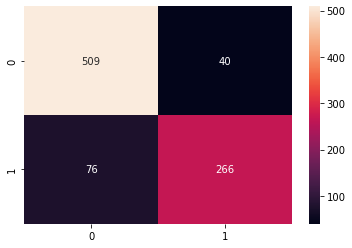

In [32]:
confusion = confusion_matrix(y, y_pred)
sns.heatmap(confusion, annot=True,fmt='d')

In [33]:
print (classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       549
           1       0.87      0.78      0.82       342

    accuracy                           0.87       891
   macro avg       0.87      0.85      0.86       891
weighted avg       0.87      0.87      0.87       891



In [34]:
import pickle
import shelve

In [35]:
s = shelve.open("prueba.db")
s["model"] = pipe
s.close()

In [36]:

s = shelve.open("prueba.db")
Pipe = s['model']
with open('Pipe.pkl', 'wb') as Pipeline:
    pickle.dump(Pipe, Pipeline)